##### [[ 5.1069646 ]
 [18.817583  ]
 [ 9.941626  ]
 [ 8.89719   ]
 [16.806465  ]
 [23.168495  ]
 [15.413435  ]
 [ 0.39691174]
 [ 2.094246  ]
 [ 1.536436  ]]
##### [[ 1.2127379 ]
 [ 0.55180347]
 [ 9.853889  ]
 [ 1.1111821 ]
 [ 1.3525    ]
 [ 0.11528345]
 [51.92507   ]
 [ 0.44647944]
 [ 0.260152  ]
 [ 3.732668  ]]
##### [[16.661758  ]
 [35.65205   ]
 [19.813587  ]
 [44.359085  ]
 [22.247702  ]
 [17.574854  ]
 [32.34412   ]
 [ 0.82088846]
 [ 0.07793191]
 [ 0.2034582 ]]
##### [[ 3.9171426 ]
 [64.549736  ]
 [ 8.071904  ]
 [ 2.024232  ]
 [ 0.21134663]
 [ 4.643418  ]
 [31.57049   ]
 [46.441647  ]
 [ 1.6019343 ]
 [10.167884  ]]
##### [[ 0.54835606]
 [ 0.26335165]
 [ 0.1181244 ]
 [ 6.7791567 ]
 [11.384788  ]
 [ 3.3913147 ]
 [11.439965  ]
 [26.224491  ]
 [ 2.9316792 ]
 [25.643368  ]]
##### [[37.040615  ]
 [ 1.570816  ]
 [16.619787  ]
 [16.34487   ]
 [ 7.677437  ]
 [21.467976  ]
 [ 0.40322393]
 [10.198042  ]
 [12.52108   ]
 [11.824514  ]]
##### [[ 2.4738262 ]
 [13.868727  ]
 [ 3.1682944 ]
 [ 0.11

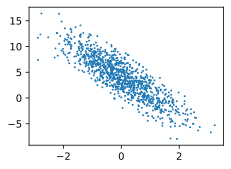

In [12]:
# 从零实现线性回归
%matplotlib inline
import random
import tensorflow as tf
from d2l import tensorflow as d2l

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

batch_size = 10

w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

# 定义模型
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return tf.matmul(X, w) + b

def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

def sgd(params, grads, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

lr = 0.03  # 学习率
num_epochs = 3  # 训练总轮数
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # X和y的小批量损失
        print(f'##### {l}')
        # 计算l关于[w,b]的梯度
        dw, db = g.gradient(l, [w, b])
        # 使用参数的梯度更新参数
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

print(f'w的估计误差: {true_w - tf.reshape(w, true_w.shape)}')
print(f'b的估计误差: {true_b - b}')